In [1]:
!pip install matplotlib
!pip install seaborn
!pip install scikit

ERROR: Could not find a version that satisfies the requirement scikit (from versions: none)
ERROR: No matching distribution found for scikit


In [2]:
import pandas as pd

tabela = pd.read_csv('advertising.csv')
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


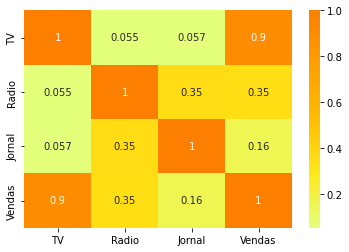

In [3]:
#Correlação entre os meios de divulgação e as vendas
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(tabela.corr(), cmap='Wistia', annot = True)
plt.show()

In [4]:
# y -> quem você quer prever
# x -> o que eu vou usar para fazer a previsão "o resto"
y = tabela['Vendas']
x = tabela[['TV', 'Radio', 'Jornal']]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size = 0.27, random_state = 1)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar os modelos
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinar os modelos
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)



RandomForestRegressor()

In [6]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn import metrics

print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))

0.9151316398071494
0.9687475717449195


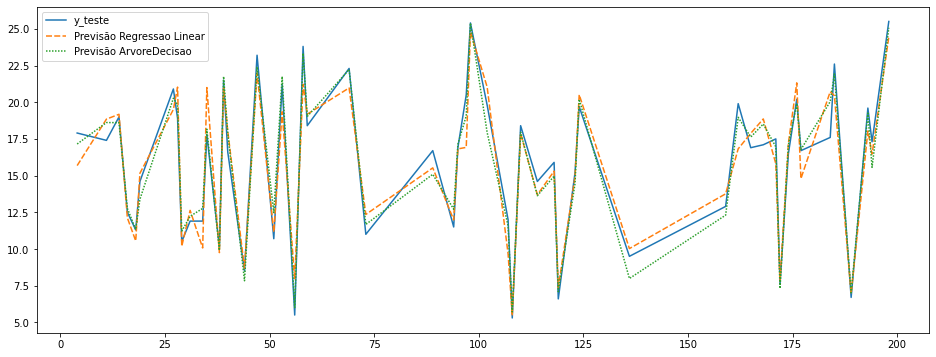

In [7]:
#arvore de decisao é o melhor modelo, vou usa-lo para fazer novas previsoes
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsão Regressao Linear'] = previsao_regressaolinear
tabela_auxiliar['Previsão ArvoreDecisao'] = previsao_arvoredecisao

plt.figure(figsize=(16,6))
sns.lineplot(data = tabela_auxiliar)
plt.show()

In [8]:
# importar a tabela com as novas informações que eu quero prever

nova_tabela = pd.read_csv('novos.csv')
display(nova_tabela)

# usar o modelo de arvore de decisao e fazer um .predic para prever os valores em vendas
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.989  8.798 19.97 ]
